# Descriptive analytics of treatment response

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import copy
import statsmodels.stats.api as sms
from scipy.stats import wilcoxon
sns.set(style="darkgrid")
import test_mod as mod
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import f_oneway

# for chapter 3.2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf


### Importing data

In [34]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms

In [35]:
# Importing data
df = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\processed\research_group.csv")

In [36]:
# Selecting variables hrctv_volume and patient id
hrctv_volume = df[['id','hrctv_volume']]

In [37]:
late_response_status_value_counts = df['late_response_status'].value_counts()
print(late_response_status_value_counts)

CR     37
PR      3
DM      2
Rec     2
Name: late_response_status, dtype: int64


### Describing values of hrctv_volume for groups of late_response_status

In [38]:
hrctv_volume_cr = df.loc[df['late_response_status'] =='CR'][['id','hrctv_volume']]
hrctv_volume_pr = df.loc[df['late_response_status'] =='PR'][['id','hrctv_volume']]
hrctv_volume_dm = df.loc[df['late_response_status'] =='DM'][['id','hrctv_volume']]
hrctv_volume_rec = df.loc[df['late_response_status'] =='Rec'][['id','hrctv_volume']]

---
Descriptive statistics of hrctv_volume_cr

In [39]:
data = hrctv_volume_cr['hrctv_volume']
data.describe()

count    37.000000
mean     28.308108
std      10.169873
min      10.500000
25%      21.200000
50%      25.600000
75%      33.900000
max      65.900000
Name: hrctv_volume, dtype: float64

In [40]:
print("95% confidence interval for the population mean value")
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

95% confidence interval for the population mean value


(24.917303557294204, 31.69891265892202)

In [41]:
|# Descriptive statistics
print("Descriptive statistics of independent variables")
print(df[['hrctv_volume','eqd2_total_dose', 'total_days']].describe())

SyntaxError: invalid syntax (Temp/ipykernel_6616/1143035208.py, line 1)

---
Descriptive statistics of hrctv_volume_pr

In [ ]:
data = hrctv_volume_pr['hrctv_volume']
data.describe()

In [ ]:
print("95% confidence interval for the population mean value")
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

---
Descriptive statistics of hrctv_volume_dm

In [ ]:
data = hrctv_volume_dm['hrctv_volume']
data.describe()

---
Descriptive statistics of hrctv_volume_rec

In [ ]:
data = hrctv_volume_rec['hrctv_volume']
data.describe()

### Describing values of eqd2_total_dose for groups of late_response_status

In [ ]:
eqd2_total_dose_cr = df.loc[df['late_response_status'] =='CR'][['id','eqd2_total_dose']]
eqd2_total_dose_pr = df.loc[df['late_response_status'] =='PR'][['id','eqd2_total_dose']]
eqd2_total_dose_dm = df.loc[df['late_response_status'] =='DM'][['id','eqd2_total_dose']]
eqd2_total_dose_rec = df.loc[df['late_response_status'] =='Rec'][['id','eqd2_total_dose']]

---
Descriptive statistics of eqd2_total_dose_cr

In [ ]:
data = eqd2_total_dose_cr['eqd2_total_dose']
data.describe()

In [ ]:
print("95% confidence interval for the population mean value")
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

---
Descriptive statistics of eqd2_total_dose_pr

In [ ]:
data = eqd2_total_dose_pr['eqd2_total_dose']
data.describe()

---
Descriptive statistics of eqd2_total_dose_dm

In [ ]:
data = eqd2_total_dose_dm['eqd2_total_dose']
data.describe()

---
Descriptive statistics of eqd2_total_dose_rec

In [ ]:
data = eqd2_total_dose_rec['eqd2_total_dose']
data.describe()

In [42]:
|# Descriptive statistics
print("Descriptive statistics of independent variables")
print(df[['hrctv_volume','eqd2_total_dose', 'total_days']].describe())

SyntaxError: invalid syntax (Temp/ipykernel_6616/1143035208.py, line 1)

In [43]:
# Correlation matrix between variables of interest
print("Correlation matrix between independent variables")
print(df[['hrctv_volume','eqd2_total_dose', 'total_days']].corr())

Correlation matrix between independent variables
                 hrctv_volume  eqd2_total_dose  total_days
hrctv_volume         1.000000         0.096286   -0.228143
eqd2_total_dose      0.096286         1.000000    0.072180
total_days          -0.228143         0.072180    1.000000


In [44]:
# Multinomial logistic regression with three independent variables
# Assigning independent and dependent variables
indep_var = df[['hrctv_volume','eqd2_total_dose','total_days']]
dep_var = df['late_response_status']



C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


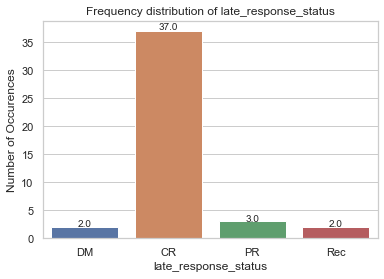

In [45]:
#Making a barplot
plot = sns.countplot(dep_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format('late_response_status'))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format('late_response_status'),fontsize=12)
plt.show()

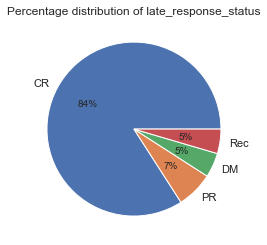

In [46]:
#Making a pie chart
late_response_status_value_counts = df['late_response_status'].value_counts()
plt.title("Percentage distribution of {}".format('late_response_status'))
plt.pie(late_response_status_value_counts, labels=late_response_status_value_counts.index, autopct='%.0f%%')
plt.show()

### Testing for correlation between eqd2_total_dose and late_response_status


<AxesSubplot:xlabel='late_response_status', ylabel='eqd2_total_dose'>

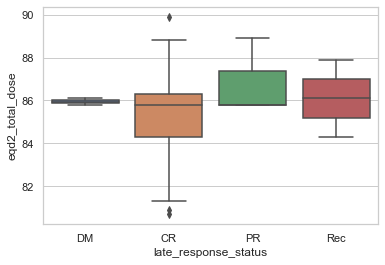

In [47]:
#Creating a boxplot between late_response_status and eqd2_total_dose
sns.boxplot(data=df,x='late_response_status', y='eqd2_total_dose')

In [48]:
# Finds out the eqd2_total_dose data for each late_response_status as a list
categoryGroupLists=df.groupby('late_response_status')['eqd2_total_dose'].apply(list)

#Performing a One-Way Anova test between the late_response_status and eqd2_total_dose
alpha = 0.05
statistic,p_value = f_oneway(*categoryGroupLists)
print ("One-Way Anova Test"+"\nTesting if there are any significant differences between the means of the values of the eqd2_total_dose for each late_response_status."+"\nThe test statistics is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The correlation is not statistically significant."+"\nHA = The correlation is statistically significant."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

One-Way Anova Test
Testing if there are any significant differences between the means of the values of the eqd2_total_dose for each late_response_status.
The test statistics is: 0.4590053189040444. The p_value is: 0.7124533565788307.
H0 = The correlation is not statistically significant.
HA = The correlation is statistically significant.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


### Testing for correlation between eqd2_total_dose and 


<AxesSubplot:xlabel='late_response_status', ylabel='hrctv_volume'>

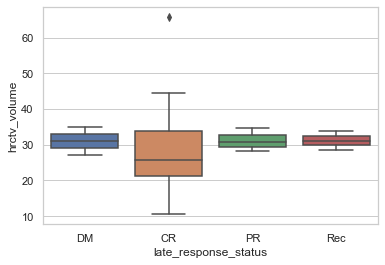

In [49]:
#Creating a boxplot between late_response_status and hrctv_volume
sns.boxplot(data=df,x='late_response_status', y='hrctv_volume')

In [50]:
# Finds out the eqd2_total_dose data for each late_response_status as a list
categoryGroupLists=df.groupby('late_response_status')['hrctv_volume'].apply(list)

#Performing a One-Way Anova test between the late_response_status and hrctv_volume
alpha = 0.05
statistic,p_value = f_oneway(*categoryGroupLists)
print ("One-Way Anova Test"+"\nTesting if there are any significant differences between the means of the values of the eqd2_total_dose for each late_response_status."+"\nThe test statistics is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The correlation is not statistically significant."+"\nHA = The correlation is statistically significant."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

One-Way Anova Test
Testing if there are any significant differences between the means of the values of the eqd2_total_dose for each late_response_status.
The test statistics is: 0.17157832114407398. The p_value is: 0.9149700403724406.
H0 = The correlation is not statistically significant.
HA = The correlation is statistically significant.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


### Multinomial logistic regression model
#### Testing the correlation between late_response_status and independent variables

In [51]:
# Multinomial logistic regression model
Y = dep_var
X = indep_var
X = sm.add_constant(X)
mnlogit_model = sm.MNLogit(Y,X)
mnlogit_fit = mnlogit_model.fit()
print(mnlogit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.569806
         Iterations 7
                           MNLogit Regression Results                           
Dep. Variable:     late_response_status   No. Observations:                   44
Model:                          MNLogit   Df Residuals:                       32
Method:                             MLE   Df Model:                            9
Date:                  Fri, 03 Dec 2021   Pseudo R-squ.:                 0.06561
Time:                          17:36:43   Log-Likelihood:                -25.071
converged:                         True   LL-Null:                       -26.832
Covariance Type:              nonrobust   LLR p-value:                    0.9400
 late_response_status=DM       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -12.5444     31.797     -0.395      0

In [52]:
# Multinomial logistic regression with two independent variables
# Assigning independent and dependent variables
indep_var = df[['hrctv_volume','eqd2_total_dose']]
dep_var = df['late_response_status']

# Multinomial Logit with the statsmodel library
Y = dep_var
X = indep_var
X = sm.add_constant(X)
mnlogit_model = sm.MNLogit(Y,X)
mnlogit_fit = mnlogit_model.fit()
print(mnlogit_fit.summary())


Optimization terminated successfully.
         Current function value: 0.587274
         Iterations 7
                           MNLogit Regression Results                           
Dep. Variable:     late_response_status   No. Observations:                   44
Model:                          MNLogit   Df Residuals:                       35
Method:                             MLE   Df Model:                            6
Date:                  Fri, 03 Dec 2021   Pseudo R-squ.:                 0.03697
Time:                          17:36:43   Log-Likelihood:                -25.840
converged:                         True   LL-Null:                       -26.832
Covariance Type:              nonrobust   LLR p-value:                    0.9212
 late_response_status=DM       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -13.4598     33.036     -0.407      0

## Assuming a binary value for the late_response_status

In [53]:
# Multinomial logistic regression with three independent variables
# Assigning independent and dependent variables
indep_var = df[['hrctv_volume','eqd2_total_dose','total_days']]
dep_var = df['late_response_status_binary']


C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


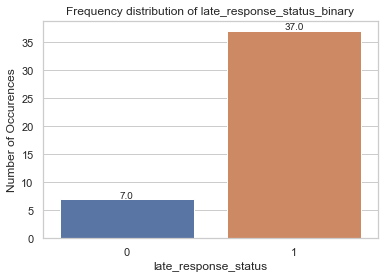

In [54]:
#Making a barplot
plot = sns.countplot(dep_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format('late_response_status_binary'))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format('late_response_status'),fontsize=12)
plt.show()

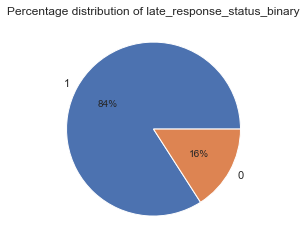

In [55]:
#Making a pie chart
late_response_status_value_counts = df['late_response_status_binary'].value_counts()
plt.title("Percentage distribution of {}".format('late_response_status_binary'))
plt.pie(late_response_status_value_counts, labels=late_response_status_value_counts.index, autopct='%.0f%%')
plt.show()

### Testing for correlation between eqd2_total_dose and late_response_status

<AxesSubplot:xlabel='late_response_status_binary', ylabel='eqd2_total_dose'>

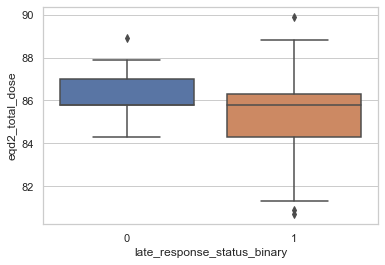

In [56]:
#Creating a boxplot between late_response_status and eqd2_total_dose
sns.boxplot(data=df,x='late_response_status_binary', y='eqd2_total_dose')

<AxesSubplot:ylabel='Count'>

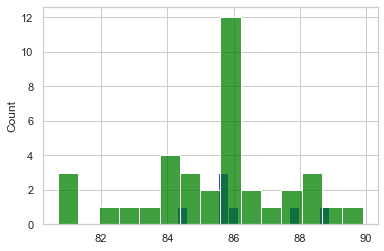

In [57]:
# Finds out the eqd2_total_dose data for each late_response_status as a list
categoryGroupLists=df.groupby('late_response_status_binary')['eqd2_total_dose'].apply(list)
eqd2_zero_response = categoryGroupLists[0]
eqd2_one_response = categoryGroupLists[1]
sns.histplot(eqd2_zero_response,bins=15,color='blue')
sns.histplot(eqd2_one_response,bins=15,color='green')

In [58]:
# Performing a t-test to check for difference in mean values of late_response_status_binary and eqd2_total_dose
alpha = 0.05
statistic,p_value = stats.ttest_ind(eqd2_zero_response, eqd2_one_response, equal_var=False)
print ("Testing values of late_response_status_binary and eqd2_total_dose if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The two population means are not equal."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of late_response_status_binary and eqd2_total_dose if the two population means are equal.
The test statistic is: 1.3366131577372582. The p_value is: 0.20879641952556713.
H0 = The two population means are equal.
HA = The two population means are not equal.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


### Testing for correlation between late_response_status_binary and hrctv_volume

<AxesSubplot:xlabel='late_response_status_binary', ylabel='hrctv_volume'>

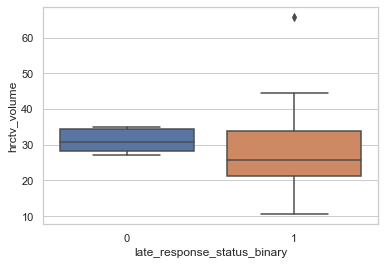

In [59]:
#Creating a boxplot between late_response_status and hrctv_volume
sns.boxplot(data=df,x='late_response_status_binary', y='hrctv_volume')

<AxesSubplot:ylabel='Count'>

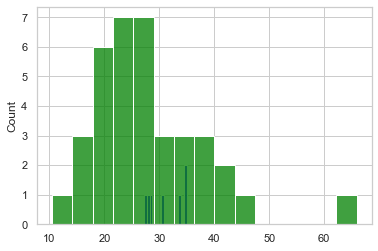

In [60]:
# Finds out the eqd2_total_dose data for each late_response_status as a list
categoryGroupLists=df.groupby('late_response_status_binary')['hrctv_volume'].apply(list)
hrctv_volume_zero_response = categoryGroupLists[0]
hrctv_volume_one_response = categoryGroupLists[1]
sns.histplot(hrctv_volume_zero_response,bins=15,color='blue')
sns.histplot(hrctv_volume_one_response,bins=15,color='green')

In [61]:
# Performing a t-test to check for difference in mean values of late_response_status_binary and hrctv_volume
alpha = 0.05
statistic,p_value = stats.ttest_ind(hrctv_volume_zero_response, hrctv_volume_one_response, equal_var=False)
print ("Testing values of late_response_status_binary and hrctv_volume if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The two population means are not equal."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of late_response_status_binary and hrctv_volume if the two population means are equal.
The test statistic is: 1.3764278948974407. The p_value is: 0.17878038657098622.
H0 = The two population means are equal.
HA = The two population means are not equal.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


### Logistic regression models


In [62]:
# Logistic regression with two independent variables
# Assigning independent and dependent variables
indep_var = df[['hrctv_volume','eqd2_total_dose']]
dep_var = df['late_response_status_binary']

# Multinomial Logit with the statsmodel library
Y = dep_var
X = indep_var
X = sm.add_constant(X)
mnlogit_model = sm.Logit(Y,X)
mnlogit_fit = mnlogit_model.fit()
print(mnlogit_fit.summary())


Optimization terminated successfully.
         Current function value: 0.419553
         Iterations 6
                                Logit Regression Results                               
Dep. Variable:     late_response_status_binary   No. Observations:                   44
Model:                                   Logit   Df Residuals:                       41
Method:                                    MLE   Df Model:                            2
Date:                         Fri, 03 Dec 2021   Pseudo R-squ.:                 0.04247
Time:                                 17:36:46   Log-Likelihood:                -18.460
converged:                                True   LL-Null:                       -19.279
Covariance Type:                     nonrobust   LLR p-value:                    0.4410
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.6154

In [63]:
#Checking Spearman's correlations
dep_var.corr(df['hrctv_volume'],method='spearman')

-0.24468997354828603

In [64]:
dep_var.corr(df['eqd2_total_dose'],method='spearman')

-0.17861059236094012

### Incorporating stage

In [65]:
df = df.loc[(df['T'] == '2B') | (df['T'] == '3B')]
indep_var = df[['hrctv_volume','eqd2_total_dose']]
dep_var = df['late_response_status']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39 non-null     int64  
 1   hrctv_volume                 39 non-null     float64
 2   eqd2_total_dose              39 non-null     float64
 3   T                            39 non-null     object 
 4   rect_sig_grade               39 non-null     float64
 5   bladder_grade                39 non-null     float64
 6   followup_timing              39 non-null     float64
 7   eqd2_rectum                  39 non-null     float64
 8   eqd2_bladder                 39 non-null     float64
 9   bladder_grade_event1         39 non-null     int64  
 10  bladder_grade_event0         39 non-null     int64  
 11  bladder_grade_event2         39 non-null     int64  
 12  rect_sig_grade_event0        39 non-null     int64  
 13  rect_sig_grade_event1 

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


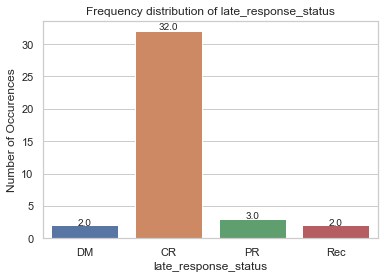

In [66]:
#Making a barplot
plot = sns.countplot(dep_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format('late_response_status'))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format('late_response_status'),fontsize=12)
plt.show()

In [67]:
# Correlation matrix between variables of interest
print("Correlation matrix between independent variables")
print(df[['hrctv_volume','eqd2_total_dose', 'T']].corr())

Correlation matrix between independent variables
                 hrctv_volume  eqd2_total_dose
hrctv_volume         1.000000         0.115134
eqd2_total_dose      0.115134         1.000000


In [68]:
df2b = df.loc[df['T'] == '2B']
df3b = df.loc[df['T'] == '3B']


C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


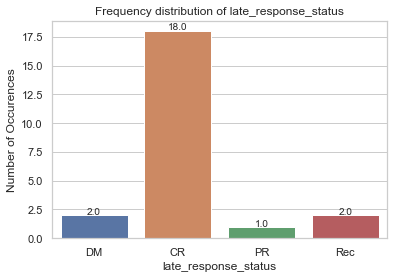

In [69]:
#Making a barplot for df2b
indep_var_2b = df2b[['hrctv_volume','eqd2_total_dose']]
dep_var_2b = df2b['late_response_status']

plot = sns.countplot(dep_var_2b)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format('late_response_status'))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format('late_response_status'),fontsize=12)
plt.show()


C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


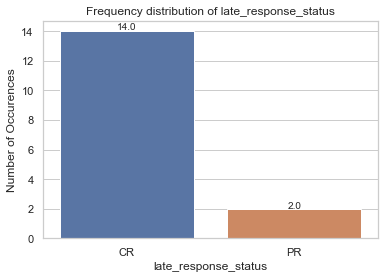

In [70]:
#Making a barplot for df3b
indep_var_3b = df3b[['hrctv_volume','eqd2_total_dose']]
dep_var_3b = df3b['late_response_status']

plot = sns.countplot(dep_var_3b)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format('late_response_status'))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format('late_response_status'),fontsize=12)
plt.show()

In [71]:
# Multinomial logistic regression with three independent variables for df2B
# Assigning independent and dependent variables
indep_var = df2b[['hrctv_volume','eqd2_total_dose']]
dep_var = df2b['late_response_status']

# Multinomial logistic regression model
Y = dep_var
X = indep_var
X = sm.add_constant(X)
mnlogit_model = sm.MNLogit(Y,X)
mnlogit_fit = mnlogit_model.fit()
print(mnlogit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.735524
         Iterations 7
                           MNLogit Regression Results                           
Dep. Variable:     late_response_status   No. Observations:                   23
Model:                          MNLogit   Df Residuals:                       14
Method:                             MLE   Df Model:                            6
Date:                  Fri, 03 Dec 2021   Pseudo R-squ.:                 0.02310
Time:                          17:36:47   Log-Likelihood:                -16.917
converged:                         True   LL-Null:                       -17.317
Covariance Type:              nonrobust   LLR p-value:                    0.9921
 late_response_status=DM       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -15.1998     34.155     -0.445      0

In [72]:
# Multinomial logistic regression with three independent variables for df3B
# Assigning independent and dependent variables
indep_var = df3b[['hrctv_volume','eqd2_total_dose']]
dep_var = df3b['late_response_status']

# Multinomial logistic regression model
Y = dep_var
X = indep_var
X = sm.add_constant(X)
mnlogit_model = sm.MNLogit(Y,X)
mnlogit_fit = mnlogit_model.fit()
print(mnlogit_fit.summary())


Optimization terminated successfully.
         Current function value: 0.308456
         Iterations 8
                           MNLogit Regression Results                           
Dep. Variable:     late_response_status   No. Observations:                   16
Model:                          MNLogit   Df Residuals:                       13
Method:                             MLE   Df Model:                            2
Date:                  Fri, 03 Dec 2021   Pseudo R-squ.:                  0.1813
Time:                          17:36:48   Log-Likelihood:                -4.9353
converged:                         True   LL-Null:                       -6.0283
Covariance Type:              nonrobust   LLR p-value:                    0.3352
late_response_status=PR       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -67.1522     53.661     -1.251      0.21